<br><br><div style='text-align:center; font-family:serif; font-size:40px; height:40px;'>IEEE-CIS Fraud Detection</div>

# 1. Business Problem

## 1.1 Description -

Imagine standing at the check-out counter at the grocery store with a long line behind you and the cashier not-so-quietly announces that your card has been declined. In this moment, you probably aren’t thinking about the data science that determined your fate.

Embarrassed, and certain you have the funds to cover everything needed for an epic nacho party for 50 of your closest friends, you try your card again. Same result. As you step aside and allow the cashier to tend to the next customer, you receive a text message from your bank. “Press 1 if you really tried to spend $500 on cheddar cheese.”

While perhaps cumbersome (and often embarrassing) in the moment, this fraud prevention system is actually saving consumers millions of dollars per year. Researchers from the IEEE Computational Intelligence Society (IEEE-CIS) want to improve this figure, while also improving the customer experience. With higher accuracy fraud detection, you can get on with your chips without the hassle.

IEEE-CIS works across a variety of AI and machine learning areas, including deep neural networks, fuzzy systems, evolutionary computation, and swarm intelligence. Today they’re partnering with the world’s leading payment service company, Vesta Corporation, seeking the best solutions for fraud prevention industry, and now you are invited to join the challenge.

In this competition, you’ll benchmark machine learning models on a challenging large-scale dataset. The data comes from Vesta's real-world e-commerce transactions and contains a wide range of features from device type to product features. You also have the opportunity to create new features to improve your results.

If successful, you’ll improve the efficacy of fraudulent transaction alerts for millions of people around the world, helping hundreds of thousands of businesses reduce their fraud loss and increase their revenue. And of course, you will save party people just like you the hassle of false positives.

<br>

# 2. Dataset Details

## 2.1 Data

The dataset given to us is as follows,

- __train_transaction.csv__ : The transaction dataset comprising the transaction details to be used for training the model.


- __train_identity.csv__ : The identity dataset comprising the additional details about the identity of the payer and the merchant among whom the transaction was performed, the details of which are present in the train_transaction.csv.


- __test_transaction.csv__ : The transaction dataset comprising the transaction information to test the performance of the trained model.


- __test_identity.csv__ : The identity dataset comprising the additional identity information about the transactions present in the test_transaction.

__Description of Transaction Dataset__

  - **TransactionID** - Id of the transaction and is the foreign key in the Identity Table.
  
  - **isFraud** - 0 or 1 signifying whether a transaction was fraudulent or not.
  
  - **TransactionDT** - timedelta from a given reference datetime (not an actual timestamp)

  - **TransactionAMT** - Transaction Payment Amount in USD.

  - **ProductCD** - Product Code.

  - **card1 - card6** - Payment Card information, such as card type, card category, issue bank, country, etc.

  - **addr** - Address

  - **dist** - Distance

  - **P_emaildomain** - Purchaser Email Domain.

  - **R_emaildomain** - Receiver Email Domain.

  - **C1-C14** - counting, such as how many addresses are found to be associated with the payment card, etc. The actual meaning is masked.

  - **D1-D15** - timedelta, such as days between previous transactions, etc.

  - **M1-M9** - match, such as names on card and address, etc.

  - **Vxxx** - Vesta engineered rich features, including ranking, counting, and other entity relations.

  >_**Categorical Features**_ -

    - ProductCD
    - card1-card6
    - addr1, addr2
    - P_emaildomain
    - R_emaildomain
    - M1-M9

<br>


__Description of the Identity Dataset__

Variables in this table are identity information – network connection information (IP, ISP, Proxy, etc) and digital signature (UA/browser/os/version, etc) associated with transactions.
They're collected by Vesta’s fraud protection system and digital security partners.

(The field names are masked and pairwise dictionary will not be provided for privacy protection and contract agreement).

> _**Categorical Features**_ -

  - DeviceType
  - DeviceInfo
  - id_12 - id_38

<br><br>

## 2.2 Understanding Of Problem

### 2.2.1 Problem Type

Since, we need to classify a transaction as fraudulent or non-fraudulent and hence, this is a binary classification problem.


### 2.2.2 Performance Metric

- The organizers decided to evaluate the submissions on area under the ROC curve between the predicted probability and the observed target. Hence, __ROC-AUC__ will be our __Key Performance Indicator (KPI)__.


- We will be additionally using the __Confusion Matrix__ to add more interpratability to the models.

__Explanation on choosing ROC-AUC as the KPI :__

In the real world, given a transaction we want our model to correctly declare it as fraudulent or not. The customer in the worst case might accept its legal transaction to be declared as fraud (False Positive) since it won't cost much except for some time to manually mark the transaction as legit but the declaration of a fraud transaction as legit (False Negative) is not at all accepted by any customer since it will often lead to huge financial and personal loss.

Thus, we can say that we can say that a model will be a good model if it has a low False Positives Rate as well as the False Negative Rate, this statement explains why we can't use precision or recall alone, since precision is useful when we are more concerned about the False Positives than the False Negatives and Recall is useful when we are more concerned for the False Negatives than the False Positives.

Now, one option is to use a metric which is the combination of Precision and Recall, one such metric is the F1-Score. We can surely use this metric but this metric doesn't give any flexibility on weighing the False Positives over False Negatives and vice-versa.

So, till now, it is clear that we need a metric which not only reduces False Positives and False Negatives but also provides the user a flexibility to weigh False Positives or False Negatives according to their needs.

Hence, a metric which can make us perform all the discussed measures is called the ROC Curve which not only optimizes for False Positives and False Negatives but also gives us the freedom to choose a threshold value which allows the user to weigh False Positives and False Negatives accordingly. The area under the ROC curve often termed as AUC helps us identify the class separability capability of the model i.e. how good is the model in separating class labels.

<br>

# 3. Exploratory Data Analysis (EDA)
<br><br>

In [ ]:
import numpy as np
import pandas as pd
import pickle
import seaborn as sns
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 3.1 Loading and Merging the Datasets
<br>

In [ ]:
# Loading Train Dataset

train_transaction = pd.read_csv('/content/drive/My Drive/Colab Notebooks/ieee-fraud-detection/Data/train_transaction.csv')
train_identity = pd.read_csv('/content/drive/My Drive/Colab Notebooks/ieee-fraud-detection/Data/train_identity.csv')

# Loading Test Dataset

test_transaction = pd.read_csv('/content/drive/My Drive/Colab Notebooks/ieee-fraud-detection/Data/test_transaction.csv')
test_identity = pd.read_csv('/content/drive/My Drive/Colab Notebooks/ieee-fraud-detection/Data/test_identity.csv')

In [ ]:
print("Train Transaction Dataset Shape : ",train_transaction.shape)
print("Train Identity Dataset Shape : ",train_identity.shape)
print('-'*50)
print("Test Transaction Dataset Shape : ",test_transaction.shape)
print("Test Identity Dataset Shape : ",test_identity.shape)

Train Transaction Dataset Shape :  (590540, 394)
Train Identity Dataset Shape :  (144233, 41)
--------------------------------------------------
Test Transaction Dataset Shape :  (506691, 393)
Test Identity Dataset Shape :  (141907, 41)


__Observation(s):__

Different number of rows in the train_transaction and train_identity dataset signifies that the identity information is not present for each transaction in train_transaction dataset. Out of 590540 in the train_transaction dataset we only have identity information of 144233 transactions.

And, in the test set we have the identity information of only 141907 transactions out of 506691 transactions.
<br><br>

In [ ]:
# Merging the transaction and identity dataset

train_data = train_transaction.merge(train_identity, how='left', on='TransactionID')
del train_transaction, train_identity

test_data = test_transaction.merge(test_identity, how='left', on='TransactionID')
del test_transaction, test_identity

In [ ]:
train_data.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M


In [ ]:
test_data.head()

In [ ]:
# test_data has a mismatch with the train data in the names of the id features, in the train data we have the id
# feature as id_x but in the test data we have the id feature as id-x and hence we will be making all names the
# id features in the test data same as the names of the id features of the train data

test_data.columns = test_data.columns.str.replace('^id-', 'id_', regex=True)

In [ ]:
# Checking for Duplicate Rows in the training set

duplicate_rows = train_data[train_data.duplicated()]
print("Duplicate Rows :", duplicate_rows)

Duplicate Rows : Empty DataFrame
Columns: [TransactionID, isFraud, TransactionDT, TransactionAmt, ProductCD, card1, card2, card3, card4, card5, card6, addr1, addr2, dist1, dist2, P_emaildomain, R_emaildomain, C1, C2, C3, C4, C5, C6, C7, C8, C9, C10, C11, C12, C13, C14, D1, D2, D3, D4, D5, D6, D7, D8, D9, D10, D11, D12, D13, D14, D15, M1, M2, M3, M4, M5, M6, M7, M8, M9, V1, V2, V3, V4, V5, V6, V7, V8, V9, V10, V11, V12, V13, V14, V15, V16, V17, V18, V19, V20, V21, V22, V23, V24, V25, V26, V27, V28, V29, V30, V31, V32, V33, V34, V35, V36, V37, V38, V39, V40, V41, V42, V43, V44, V45, ...]
Index: []

[0 rows x 434 columns]


**Observation(s):**

No duplicate rows are present in the dataset.
<br><br>

In [ ]:
# Checking for duplicate columns

def getDuplicateColumns(df):

    '''
    Utility Function to get a list of duplicate columns.
    '''

    duplicateColumnNames = set()
    # Iterate over all the columns in dataframe
    for x in range(df.shape[1]):
        # Select column at xth index.
        col = df.iloc[:, x]
        # Iterate over all the columns in DataFrame from (x+1)th index till end
        for y in range(x + 1, df.shape[1]):
            # Select column at yth index.
            otherCol = df.iloc[:, y]
            # Check if two columns at x 7 y index are equal
            if col.equals(otherCol):
                duplicateColumnNames.add(df.columns.values[y])
    return list(duplicateColumnNames)

duplicate_columns = getDuplicateColumns(train_data)

print(duplicate_columns)

[]


**Observation(s):**

No duplicate columns are present in the dataset.
<br><br>

In [ ]:
# Sorting the Dataframe by the TransactionDT column

train_data.sort_values(by='TransactionDT' ,inplace=True)
test_data.sort_values(by='TransactionDT' , inplace=True)

In [ ]:
# Saving the merged train and test dataset into pickle format

train_data.to_pickle('merged_train.pkl')
test_data.to_pickle('merged_test.pkl')

del train_data, test_data


## 3.2 Exploring the Dataset

<br>

### Loading Data
<br>

In [ ]:
# Loading the merged train and test dataset

train_data = pd.read_pickle("merged_train.pkl")
test_data = pd.read_pickle("merged_test.pkl")

In [ ]:
print("*"*35)
print("\n Train Data Shape : {} \n".format(train_data.shape))
print("\n Test Data Shape : {} \n".format(test_data.shape))
print("*"*35)

***********************************

 Train Data Shape : (590540, 434) 


 Test Data Shape : (506691, 433) 

***********************************


### __Exploring Missing Values__
<br>

In [ ]:
def missing_info(column, df):

    na = df[column].isna()
    count = na.sum()
    total_count = df.shape[0]
    miss_prcnt = np.round((count/total_count)*100,3)

    return (count, miss_prcnt)

In [ ]:
def missing_train_info(df):

    columns_missing_info = []

    for column in df:

        count, miss_prcnt = missing_info(column, df);

        if(count):
            columns_missing_info.append([column, count, miss_prcnt])

    column_names = ['Feature_Name', 'Missing_Count', 'Missing_Percentage']

    missing_info_df = pd.DataFrame(data = columns_missing_info, columns = column_names)

    return missing_info_df

In [ ]:
missing_train_df = missing_train_info(train_data)

In [ ]:
pd.set_option("display.max_rows", None, "display.max_columns", None)

In [ ]:
missing_train_df.head(train_data.shape[1])

,Feature_Name,Missing_Count,Missing_Percentage
0,card2,8933,1.513
1,card3,1565,0.265
2,card4,1577,0.267
3,card5,4259,0.721
4,card6,1571,0.266
5,addr1,65706,11.126
6,addr2,65706,11.126
7,dist1,352271,59.652
8,dist2,552913,93.628
9,P_emaildomain,94456,15.995


__Observation(s):__

A very interesting of missing values can be seen in the V_features, subgroups having same number of missing values are present in the V_features.
<br><br>

### __Performing EDA__
<br>

In [ ]:
def cat_num_features(df):

    '''
        Utility Function to get the names of Categorical Features and
        Numerical Features of the given Dataset.
    '''

    catf = []
    numf = []

    # Given Categorical Features
    catf = ['ProductCD', 'card1', 'card2', 'card3', 'card4', 'card5', \
            'card6', 'addr1', 'addr2', 'P_emaildomain', 'R_emaildomain', 'M1', 'M2', \
            'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9', \
            'DeviceType', 'DeviceInfo']
    catf+=['id_'+str(i) for i in range(12,39)]


    # Updating the Categorical Feature Names List based on the columns present in the dataframe
    catf = [feature for feature in catf if feature in df.columns.values]
    numf = [feature for feature in df.columns if feature not in catf and not feature == 'isFraud']

    return (catf, numf)

In [ ]:
# Storing Categorical and Numerical Feature Names

catf, numf = cat_num_features(train_data)

In [ ]:
# Filling all the NaN values of Non-Numeric Categorical Features with "NaN" string to perform EDA

non_num = [f for f in catf if train_data[f].dtype == object]
train_data[non_num] = train_data[non_num].fillna('NaN')

<br>

#### - Univariate Analysis
<br>

- #### Target Variable (isFraud)
<br>

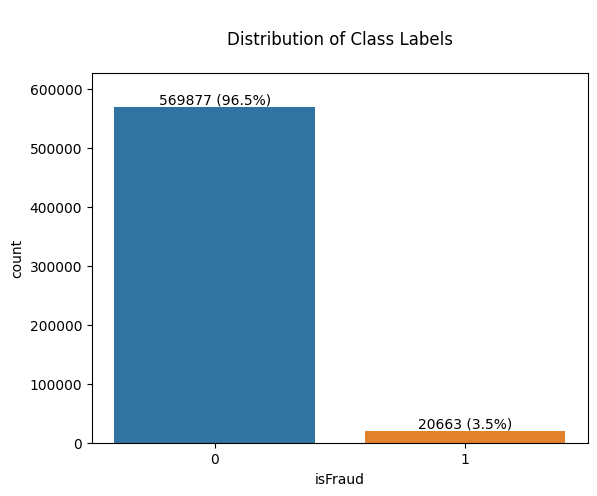

In [ ]:
ax = sns.countplot(x='isFraud', data = train_data)

plt.title("\nDistribution of Class Labels\n")

plt.margins(0.05, 0.1)

for p in ax.patches:
  x=p.get_bbox().get_points()[:,0]
  y=p.get_bbox().get_points()[1,1]
  ax.annotate('{} ({:.1f}%)'.format(int(y),100.*y/len(train_data)), (x.mean(), y),
          ha='center', va='bottom')

plt.show()

__Observation(s):__

1. The count of fraudulent transactions present in the dataset are very few as compared to the non-fraudulent transactions which implies that the dataset is extremely imbalanced.


2. We need to keep this thing in mind while modeling especially for the models which get highly impacted due to the class imbalance.
<br><br>

- #### Categorical Features
<br><br>

In [ ]:
# We have the followig Categorical Features

print(catf)

['ProductCD', 'card1', 'card2', 'card3', 'card4', 'card5', 'card6', 'addr1', 'addr2', 'P_emaildomain', 'R_emaildomain', 'M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9', 'DeviceType', 'DeviceInfo', 'id_12', 'id_13', 'id_14', 'id_15', 'id_16', 'id_17', 'id_18', 'id_19', 'id_20', 'id_21', 'id_22', 'id_23', 'id_24', 'id_25', 'id_26', 'id_27', 'id_28', 'id_29', 'id_30', 'id_31', 'id_32', 'id_33', 'id_34', 'id_35', 'id_36', 'id_37', 'id_38']


> __ProductCD__

In [ ]:
train_data[['ProductCD']].describe()

,ProductCD
count,590540
unique,5
top,W
freq,439670


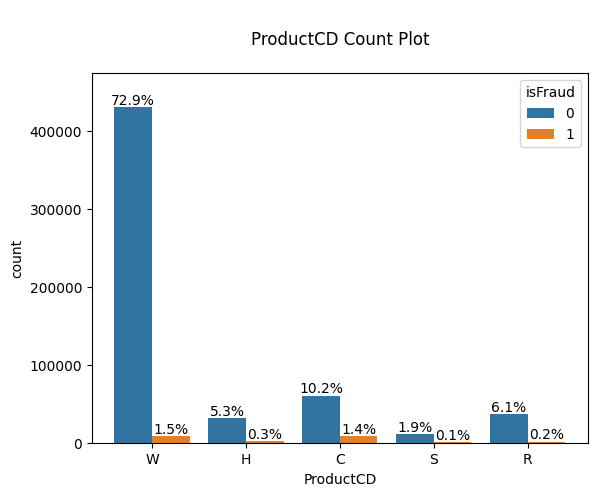

In [ ]:
ax = sns.countplot(x='ProductCD', hue='isFraud', data = train_data)

plt.margins(0.05, 0.1)

for p in ax.patches:
  x=p.get_bbox().get_points()[:,0]
  y=p.get_bbox().get_points()[1,1]
  ax.annotate('{:.1f}%'.format(100.*y/len(train_data)), (x.mean(), y),
          ha='center', va='bottom')

plt.title('\nProductCD Count Plot\n')
plt.show()

__Observation(s):__


1. Majority of the transactions have been done for the ProductCD "W".


2. Even though the number of transactions having ProductCD "C" are very less as compared to the number of transactions having ProductCD "W", the number of fraudulent transactions are almost comparable for both the categories.
<br><br>

>__card1-card6__

In [ ]:
card_features = ['card'+str(i) for i in range(1,7) if "card"+str(i) in catf]

In [ ]:
for f in card_features:
    print('\n',"*"*10,f,"*"*10,'\n')
    print(train_data[f].describe())
    if(train_data[f].dtype != object):
        len_unique_cat = len(np.unique(train_data[f]))
        print("\n{} feature has {} unique categories\n".format(f, len_unique_cat))


 ********** card1 ********** 

count    590540.000000
mean       9898.734658
std        4901.170153
min        1000.000000
25%        6019.000000
50%        9678.000000
75%       14184.000000
max       18396.000000
Name: card1, dtype: float64

card1 feature has 13553 unique categories


 ********** card2 ********** 

count    581607.000000
mean        362.555488
std         157.793246
min         100.000000
25%         214.000000
50%         361.000000
75%         512.000000
max         600.000000
Name: card2, dtype: float64

card2 feature has 501 unique categories


 ********** card3 ********** 

count    588975.000000
mean        153.194925
std          11.336444
min         100.000000
25%         150.000000
50%         150.000000
75%         150.000000
max         231.000000
Name: card3, dtype: float64

card3 feature has 115 unique categories


 ********** card4 ********** 

count     590540
unique         5
top         visa
freq      384767
Name: card4, dtype: object

 ********** 

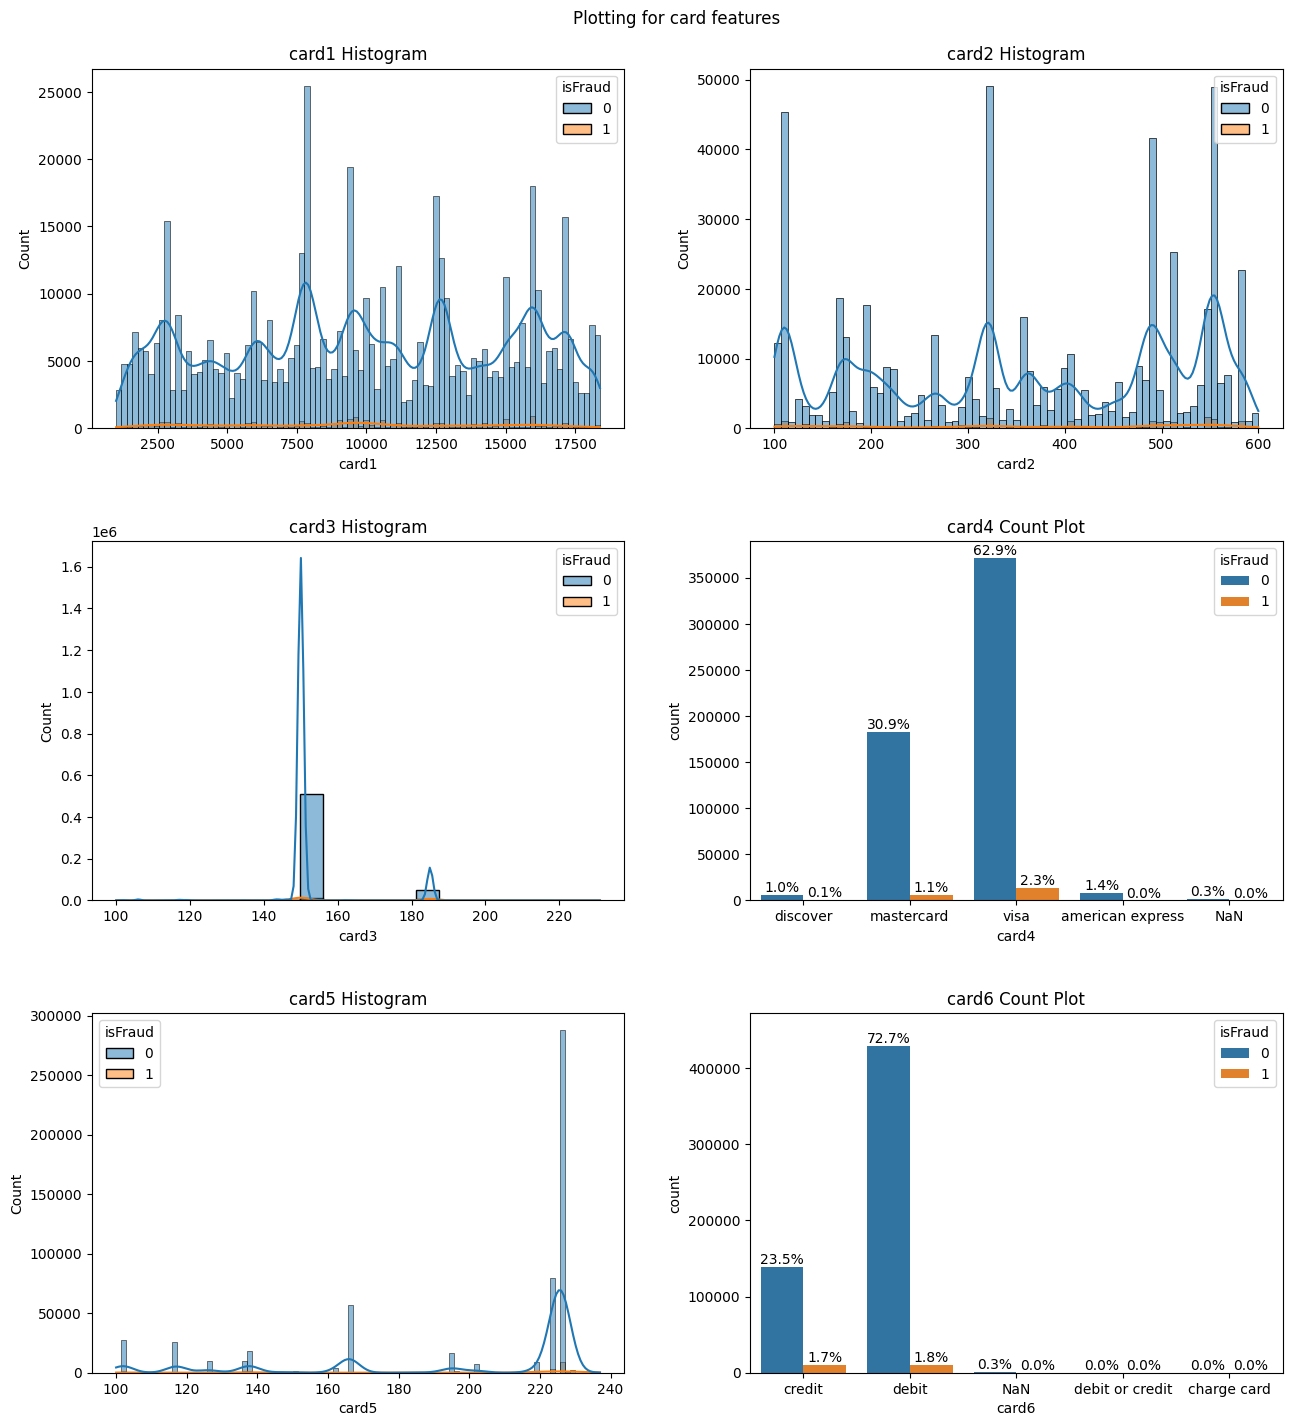

In [ ]:
fig, axes = plt.subplots(3, 2, figsize=(14, 15))

fig.tight_layout(pad=6.0)
fig.suptitle('Plotting for card features')
idx = 0

plt.margins(0.05, 0.1)

for i in range(3):
    for j in range(2):

        if(idx==len(card_features)):
            break

        f = card_features[idx]
        idx+=1

        if(train_data[f].dtype == object):
            sns.countplot(x=f,hue='isFraud', data=train_data, ax=axes[i,j])
            axes[i,j].set_title(f+" Count Plot")

            for p in axes[i,j].patches:
              x=p.get_bbox().get_points()[:,0]
              y=p.get_bbox().get_points()[1,1]
              axes[i,j].annotate('{:.1f}%'.format(100.*y/len(train_data)), (x.mean(), y),
                      ha='center', va='bottom')


        else:
            sns.histplot(x=f,hue='isFraud', data=train_data, ax=axes[i,j], kde=True)
            axes[i,j].set_title(f+" Histogram")

__Observation(s):__

1. card1, card2, card3 and card5 are encoded as a numerical categorical variable and their real meaning is not clear just seeing the values.


2. card1 and card2 have the most number of categories as compared to the other cards.


3. card4 feature corresponds to the type of card whereas card6 feature corresponds to the card company. Majority of card holders use "debit" cards and the most used companies are "visa" and "mastercard".


4. The percentage of fraud is higher with the "credit" cards.
<br><br>

> __addr1-addr2__

In [ ]:
addr_features = ['addr'+str(i) for i in range(1,3) if "addr"+str(i) in catf]

In [ ]:
for f in addr_features:
    print('\n',"*"*10,f,"*"*10,'\n')
    print(train_data[f].describe())
    if(train_data[f].dtype != object):
        len_unique_cat = len(np.unique(train_data[f]))
        print("\n{} feature has {} unique categories\n".format(f, len_unique_cat))


 ********** addr1 ********** 

count    524834.000000
mean        290.733794
std         101.741072
min         100.000000
25%         204.000000
50%         299.000000
75%         330.000000
max         540.000000
Name: addr1, dtype: float64

addr1 feature has 333 unique categories


 ********** addr2 ********** 

count    524834.000000
mean         86.800630
std           2.690623
min          10.000000
25%          87.000000
50%          87.000000
75%          87.000000
max         102.000000
Name: addr2, dtype: float64

addr2 feature has 75 unique categories



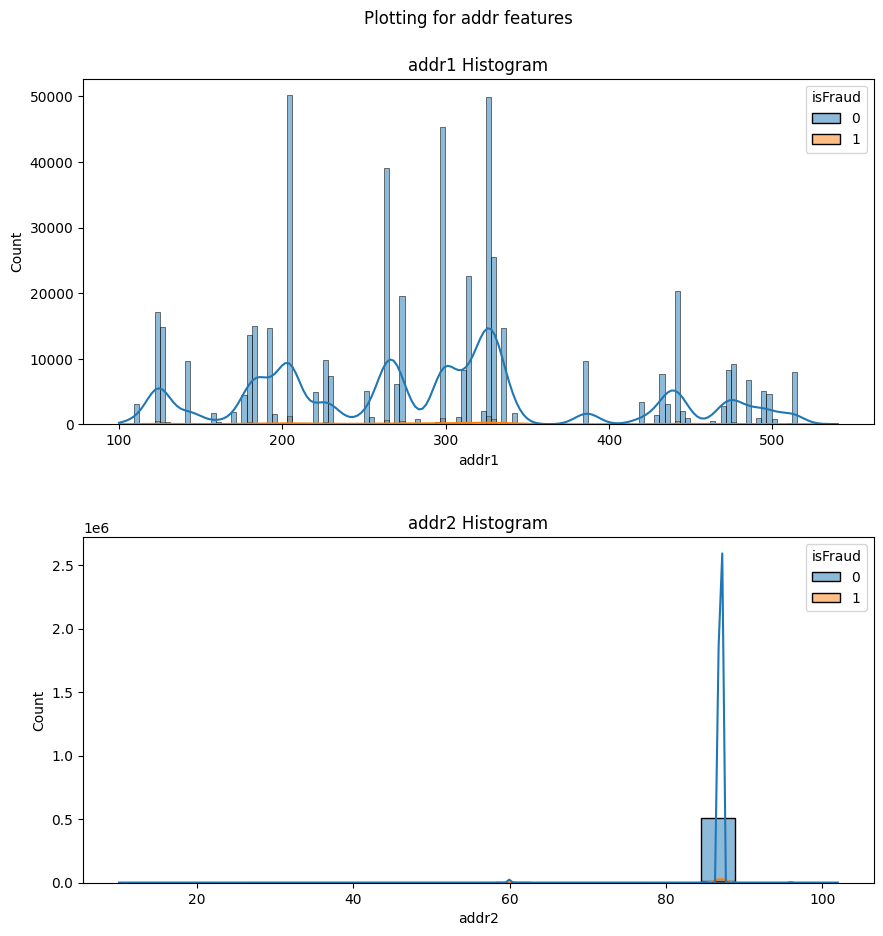

In [ ]:
fig, axes = plt.subplots(2, 1, figsize=(10, 10))
fig.tight_layout(pad=6.0)
fig.suptitle('Plotting for addr features')
idx = 0

for i in range(2):

        if(idx==len(addr_features)):
            break

        f = addr_features[idx]
        idx+=1

        sns.histplot(x=f,hue='isFraud', data=train_data, ax=axes[i], kde=True)
        axes[i].set_title(f+" Histogram")

__Observation(s):__

1. addr1 feature corresponds to the city zip code but it is encoded to avoid revealing the actual codes.


2. The card2 feature has a majority of values as 87 and the region for this is the fact that this feature corresponds to the billing country and most of the transactions are from a single country only.
<br><br>

> __P_emaildomain and R_emaildomain__

In [ ]:
domain_features = ['P_emaildomain', 'R_emaildomain']

In [ ]:
for f in domain_features:
    print('\n',"*"*10,f,"*"*10,'\n')
    print(train_data[f].describe())
    if(train_data[f].dtype != object):
        len_unique_cat = len(np.unique(train_data[f]))
        print("\n{} feature has {} unique categories\n".format(f, len_unique_cat))


 ********** P_emaildomain ********** 

count        590540
unique           60
top       gmail.com
freq         228355
Name: P_emaildomain, dtype: object

 ********** R_emaildomain ********** 

count     590540
unique        61
top          NaN
freq      453249
Name: R_emaildomain, dtype: object


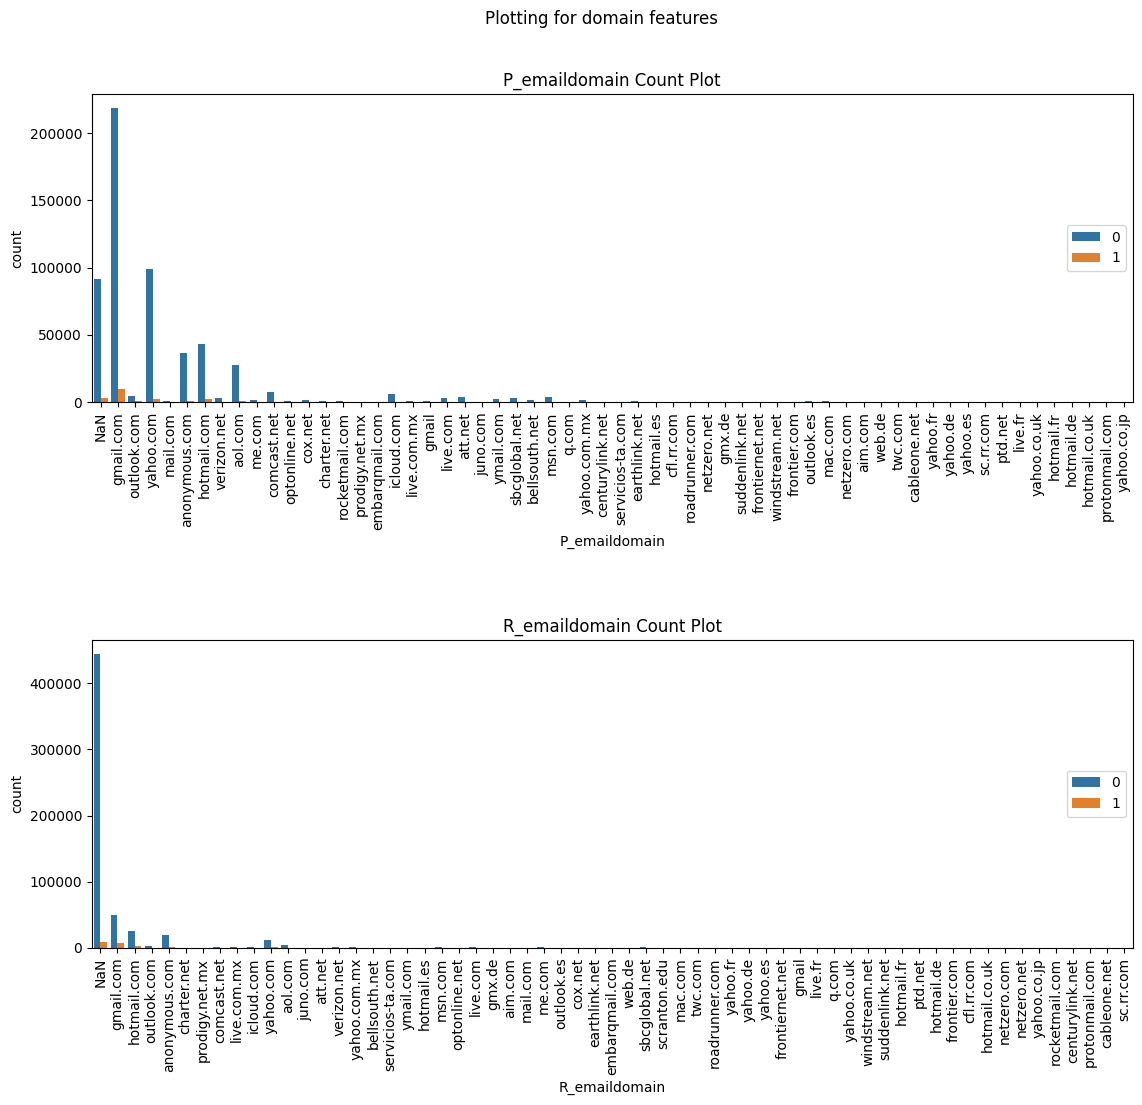

In [ ]:
fig, axes = plt.subplots(2, 1, figsize=(15, 13))

fig.tight_layout(pad=15.0)
fig.suptitle('Plotting for domain features', y=0.9)
idx = 0

for i in range(2):

        if(idx==len(domain_features)):
            break

        f = domain_features[idx]
        idx+=1

        sns.countplot(x=f,hue='isFraud', data=train_data, ax=axes[i])

        axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=90, ha='center')
        axes[i].legend(loc=7)
        axes[i].set_title(f+" Count Plot")

__Observation(s):__

1. Majority of the Card Holders (Purchaser) have the well know email domains like "gmail.com", "yahoo.com" etc.


2. There are also some domains like outlook.es, protonmail.com, aim.com etc. which have almost same percentage of fraudulent and non-fraudulent transactions which means transactions with these email domains have the highest chance of being fraudulent.


3. We do not have any R_emaildomain for majority of transactions and the reason for this is that not every transaction receives a slip from the receipent and hence has no information about his email.
<br><br>

> __M1-M9__

In [ ]:
m_features = ["M"+str(i) for i in range(1,10) if "M"+str(i) in catf]

In [ ]:
for f in m_features:
    print('\n',"*"*10,f,"*"*10,'\n')
    print(train_data[f].describe())
    if(train_data[f].dtype != object):
        len_unique_cat = len(np.unique(train_data[f]))
        print("\n{} feature has {} unique categories\n".format(f, len_unique_cat))


 ********** M1 ********** 

count     590540
unique         3
top            T
freq      319415
Name: M1, dtype: object

 ********** M2 ********** 

count     590540
unique         3
top            T
freq      285468
Name: M2, dtype: object

 ********** M3 ********** 

count     590540
unique         3
top          NaN
freq      271100
Name: M3, dtype: object

 ********** M4 ********** 

count     590540
unique         4
top          NaN
freq      281444
Name: M4, dtype: object

 ********** M5 ********** 

count     590540
unique         3
top          NaN
freq      350482
Name: M5, dtype: object

 ********** M6 ********** 

count     590540
unique         3
top            F
freq      227856
Name: M6, dtype: object

 ********** M7 ********** 

count     590540
unique         3
top          NaN
freq      346265
Name: M7, dtype: object

 ********** M8 ********** 

count     590540
unique         3
top          NaN
freq      346252
Name: M8, dtype: object

 ********** M9 ********** 

cou

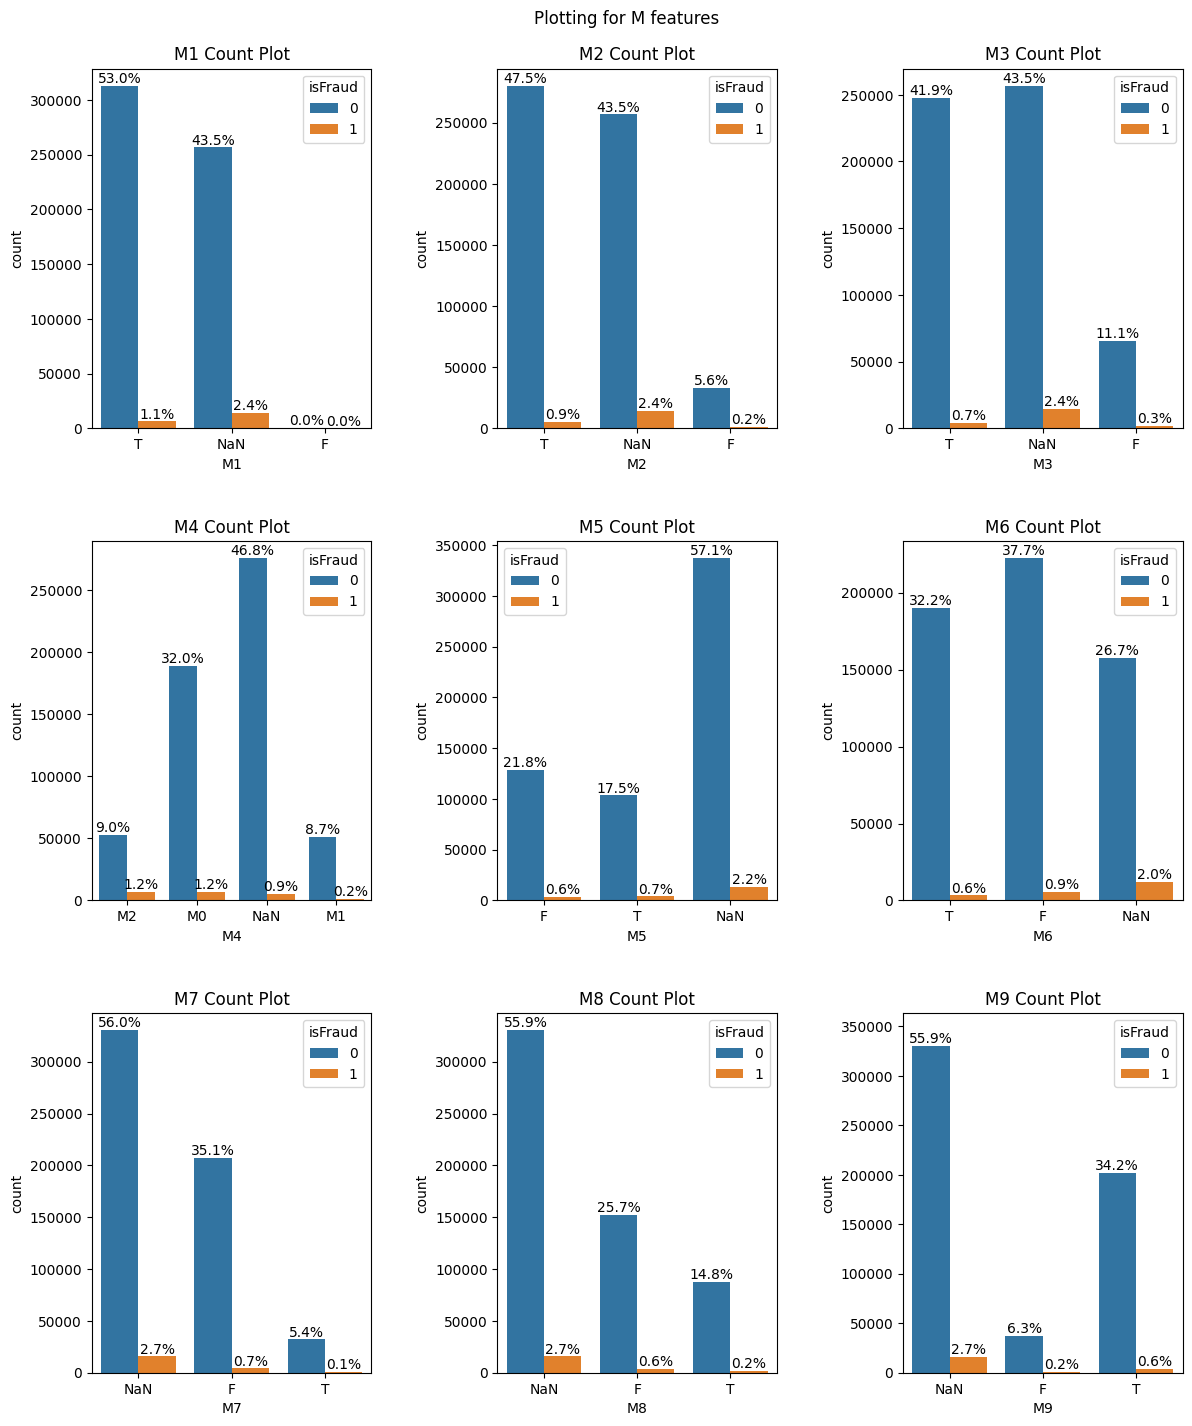

In [ ]:
fig, axes = plt.subplots(3, 3, figsize=(13, 15))

fig.tight_layout(pad=6.0)
fig.suptitle('Plotting for M features')
idx = 0

plt.margins(0.05, 0.1)

for i in range(3):
    for j in range(3):

        if(idx==len(m_features)):
            break

        f = m_features[idx]
        idx+=1

        sns.countplot(x=f,hue='isFraud', data=train_data, ax=axes[i,j])

        for p in axes[i,j].patches:
              x=p.get_bbox().get_points()[:,0]
              y=p.get_bbox().get_points()[1,1]
              axes[i,j].annotate('{:.1f}%'.format(100.*y/len(train_data)), (x.mean(), y),
                      ha='center', va='bottom')

        axes[i,j].set_title(f+" Count Plot")

__Observation(s):__

1. These features corresponds to the match value such as name on card match or not etc. therefore most of these features are of the form "T" or "F".


2. Majority of the transactions have no information regarding these features.
<br><br>

> __DeviceType__

In [ ]:
train_data[['DeviceType']].describe()

,DeviceType
count,590540
unique,3
top,NaN
freq,449730


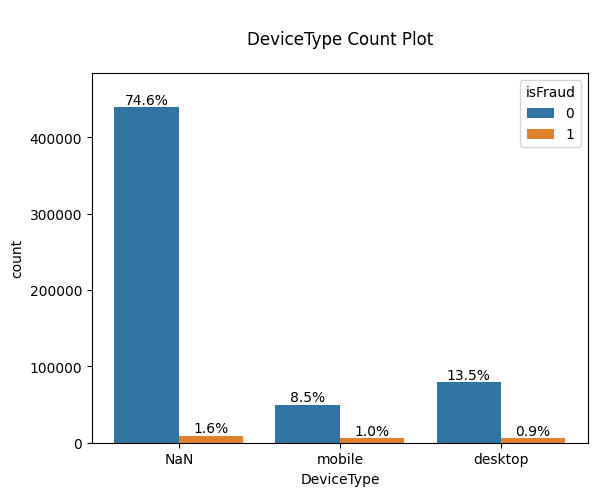

In [ ]:
ax = sns.countplot(x='DeviceType', hue='isFraud', data = train_data)

plt.margins(0.05, 0.1)

for p in ax.patches:
              x=p.get_bbox().get_points()[:,0]
              y=p.get_bbox().get_points()[1,1]
              ax.annotate('{:.1f}%'.format(100.*y/len(train_data)), (x.mean(), y),
                      ha='center', va='bottom')

plt.title('\nDeviceType Count Plot\n')
plt.show()

__Observation(s):__

1. DeviceType Info is not present for majority of the transactions.


2. The percentage of fraudulent transactions relative to other transactions is quite high, i.e., the chances of a transaction being fraudulent done using mobile is high.
<br><br>

> __DeviceInfo__

In [ ]:
train_data[['DeviceInfo']].describe()

,DeviceInfo
count,590540
unique,1787
top,NaN
freq,471874


In [ ]:
plt.figure(figsize=(250,10))
ax = sns.countplot(x='DeviceInfo', hue='isFraud', data=train_data)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='center')
plt.title('\nDeviceInfo Count Plot\n')
plt.tight_layout()
plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# Top 50 DeviceInfo Value Counts

train_data['DeviceInfo'].value_counts()[:50]

NaN                                    471874
Windows                                 47722
iOS Device                              19782
MacOS                                   12573
Trident/7.0                              7440
rv:11.0                                  1901
rv:57.0                                   962
SM-J700M Build/MMB29K                     549
SM-G610M Build/MMB29K                     461
SM-G531H Build/LMY48B                     410
rv:59.0                                   362
SM-G935F Build/NRD90M                     334
SM-G955U Build/NRD90M                     328
SM-G532M Build/MMB29T                     316
ALE-L23 Build/HuaweiALE-L23               312
SM-G950U Build/NRD90M                     290
SM-G930V Build/NRD90M                     274
rv:58.0                                   269
rv:52.0                                   256
SAMSUNG                                   235
SM-G950F Build/NRD90M                     225
Moto G (4) Build/NPJ25.93-14.7    

> __id_12-id_38__

In [ ]:
id_features = ["id_"+str(i) for i in range(12, 39) if "id_"+str(i) in catf]

In [ ]:
for f in id_features:
    print('\n',"*"*10,f,"*"*10,'\n')
    print(train_data[f].describe())
    if(train_data[f].dtype != object):
        len_unique_cat = len(np.unique(train_data[f]))
        print("\n{} feature has {} unique categories\n".format(f, len_unique_cat))


 ********** id_12 ********** 

count     590540
unique         3
top          NaN
freq      446307
Name: id_12, dtype: object

 ********** id_13 ********** 

count    127320.000000
mean         48.053071
std          11.774858
min          10.000000
25%          49.000000
50%          52.000000
75%          52.000000
max          64.000000
Name: id_13, dtype: float64

id_13 feature has 55 unique categories


 ********** id_14 ********** 

count    80044.000000
mean      -344.507146
std         93.695502
min       -660.000000
25%       -360.000000
50%       -300.000000
75%       -300.000000
max        720.000000
Name: id_14, dtype: float64

id_14 feature has 26 unique categories


 ********** id_15 ********** 

count     590540
unique         4
top          NaN
freq      449555
Name: id_15, dtype: object

 ********** id_16 ********** 

count     590540
unique         3
top          NaN
freq      461200
Name: id_16, dtype: object

 ********** id_17 ********** 

count    139369.000000
me

In [ ]:
fig, axes = plt.subplots(27, figsize=(35, 200))

fig.tight_layout(pad=18.0)
fig.suptitle('Plotting for id features')
idx = 0

for i in range(27):

        if(idx==len(id_features)):
            break

        f = id_features[idx]
        idx+=1

        if(train_data[f].dtype == object):
            sns.countplot(x=f,hue='isFraud', data=train_data, ax=axes[i])
            axes[i].set_title(f+" Count Plot")

            if(len(train_data[f].unique())>10):
                axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=90, ha='center')

        else:
            sns.histplot(x=f,hue='isFraud', data=train_data, ax=axes[i], kde=True)
            axes[i].set_title(f+" Histogram")

__Observation(s):__

1. Some of the id_features are self-explanatory while others are encoded.


2. id_28 has values as "Found" and "New", this feature may correspond to the history of the transaction i.e. whether any transaction with the same details has been done before or this is the first time this transaction is happening.


3. id_30 feature corresponds to the operating system being run on the device used for the transaction.


4. id_31 corresponds to the browser being used for making the transaction.


5. id_33 corresponds to the dimensions of the device being used for the transaction.
<br><br>

- #### Quantitative Features
<br>

In [ ]:
# We have the followig Quantitative Features

print(numf)

['TransactionID', 'TransactionDT', 'TransactionAmt', 'dist1', 'dist2', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C14', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10', 'D11', 'D12', 'D13', 'D14', 'D15', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29', 'V30', 'V31', 'V32', 'V33', 'V34', 'V35', 'V36', 'V37', 'V38', 'V39', 'V40', 'V41', 'V42', 'V43', 'V44', 'V45', 'V46', 'V47', 'V48', 'V49', 'V50', 'V51', 'V52', 'V53', 'V54', 'V55', 'V56', 'V57', 'V58', 'V59', 'V60', 'V61', 'V62', 'V63', 'V64', 'V65', 'V66', 'V67', 'V68', 'V69', 'V70', 'V71', 'V72', 'V73', 'V74', 'V75', 'V76', 'V77', 'V78', 'V79', 'V80', 'V81', 'V82', 'V83', 'V84', 'V85', 'V86', 'V87', 'V88', 'V89', 'V90', 'V91', 'V92', 'V93', 'V94', 'V95', 'V96', 'V97', 'V98', 'V99', 'V100', 'V101', 'V102', 'V103', 'V104', 'V105', 'V106', 'V10

>__TransactionDT__

In [ ]:
train_data[['TransactionDT']].describe().astype(int)

,TransactionDT
count,590540
mean,7372311
std,4617223
min,86400
25%,3027057
50%,7306527
75%,11246620
max,15811131


__Observation(s):__

Following Inferences can be made from the above result,


1. Transaction date does not look like a date but if we closely observe the minimum value of TransactionDT i.e. 86400 which is equal to 24\*60\*60 = 86400 i.e. 24 hours * 60 minutes * 60 seconds second. Hence, we can consider this TransactionDT column as the time in seconds. Now, once we know that this column is the time in seconds, we can use this column to create new time related features namely time in minutes and time in hours etc.


2. Since we have the minimum value of this feature as 86400 which means the first transaction that took place had this time stamp and for every further transaction the time stamp is given relative to this minimum timestamp only. Hence, if we consider this as any day of week like sunday then all the transactions can also be assigned a day of week which will be another feature.


3. In a similar manner we can assign month to each of the transactions.


4. The maximum value of TransactionDT in train dataset is 15811131 which is approximately equal to 183 (15811131/(60\*60\*24)) which means the train data has a span of 6 months.
<br><br>

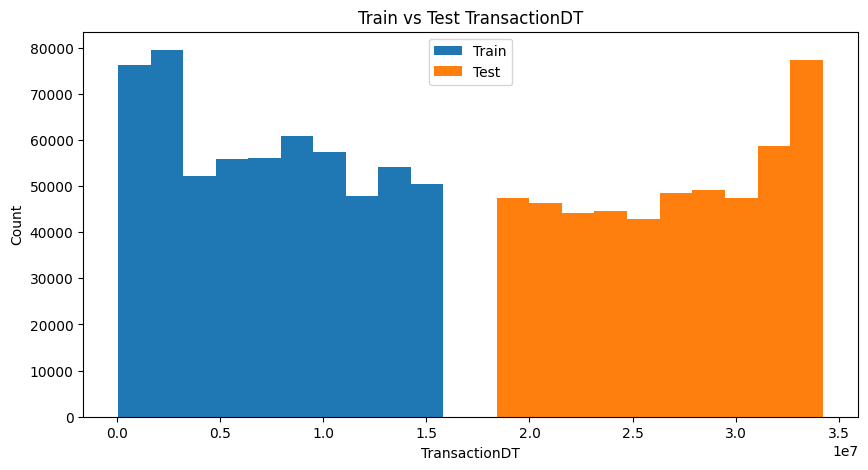

In [ ]:
plt.figure(figsize=(10,5))
plt.hist(x = 'TransactionDT', data = train_data, label='Train')
plt.hist(x = 'TransactionDT', data = test_data, label='Test')
plt.title("Train vs Test TransactionDT")
plt.xlabel("TransactionDT")
plt.ylabel("Count")
plt.legend()
plt.show()

__Observation(s):__

1. Train and Test Split has been done wrt time and there is a gap in terms of time between the train and test set.
<br><br>

>__TransactionAmt__

In [ ]:
train_data[['TransactionAmt']].describe()

,TransactionAmt
count,590540.000000
mean,135.027176
std,239.162522
min,0.251000
25%,43.321000
50%,68.769000
75%,125.000000
max,31937.391000


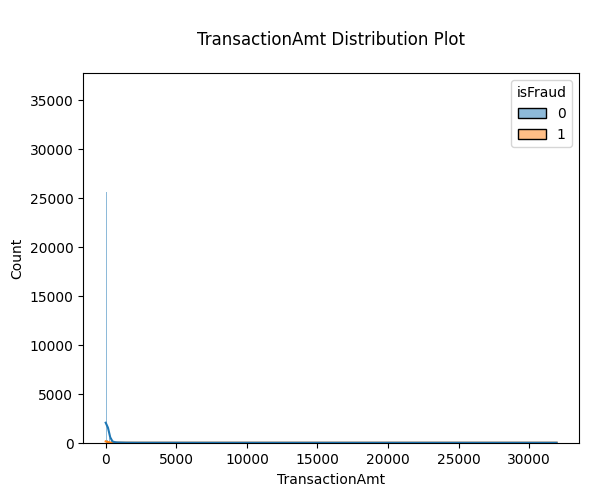

In [ ]:
sns.histplot(x='TransactionAmt', hue='isFraud', data=train_data, kde=True)
plt.title('\nTransactionAmt Distribution Plot\n')
plt.show()

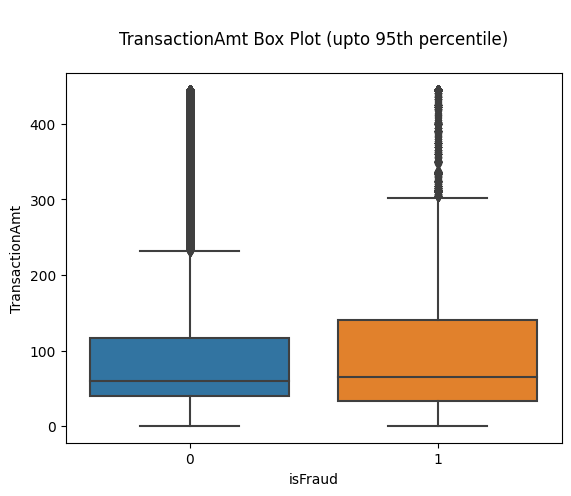

In [ ]:
sns.boxplot(y='TransactionAmt', x='isFraud', data=train_data[train_data['TransactionAmt']<=np.percentile(train_data['TransactionAmt'], 95)])
plt.title('\nTransactionAmt Box Plot (upto 95th percentile)\n')
plt.show()

__Observation(s):__

1. The fraudulent transactions semms to have higher average TransactionAmt than the average TransactionAmt of Non-Fraudulent transactions.
<br><br>

> __C_features__

In [ ]:
c_features = ["C"+str(i) for i in range(1,15) if "C"+str(i) in numf]

In [ ]:
for f in c_features:
    print('\n',"*"*10,f,"*"*10,'\n')
    print(train_data[f].describe())
    len_unique_cat = len(np.unique(train_data[f]))
    print("\n{} feature has {} unique categories\n".format(f, len_unique_cat))


 ********** C1 ********** 

count    590540.000000
mean         14.092458
std         133.569018
min           0.000000
25%           1.000000
50%           1.000000
75%           3.000000
max        4685.000000
Name: C1, dtype: float64

C1 feature has 1657 unique categories


 ********** C2 ********** 

count    590540.000000
mean         15.269734
std         154.668899
min           0.000000
25%           1.000000
50%           1.000000
75%           3.000000
max        5691.000000
Name: C2, dtype: float64

C2 feature has 1216 unique categories


 ********** C3 ********** 

count    590540.000000
mean          0.005644
std           0.150536
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          26.000000
Name: C3, dtype: float64

C3 feature has 27 unique categories


 ********** C4 ********** 

count    590540.000000
mean          4.092185
std          68.848459
min           0.000000
25%           0.000000
50%           0.000000
7

In [ ]:
fig, axes = plt.subplots(7, 2, figsize=(14, 30))

fig.tight_layout(pad=6.0)
fig.suptitle('Plotting for C_features', y=1)
idx = 0

for i in range(7):
    for j in range(2):

        if(idx==len(c_features)):
            break

        f = c_features[idx]
        idx+=1

        sns.histplot(x=f, hue='isFraud', data=train_data, ax=axes[i,j])
        axes[i,j].set_title(f+" Histogram")

KeyboardInterrupt: ignored

Error in callback <function _draw_all_if_interactive at 0x7f940c485000> (for post_execute):


KeyboardInterrupt: ignored

Error in callback <function flush_figures at 0x7f940c484280> (for post_execute):


KeyboardInterrupt: ignored

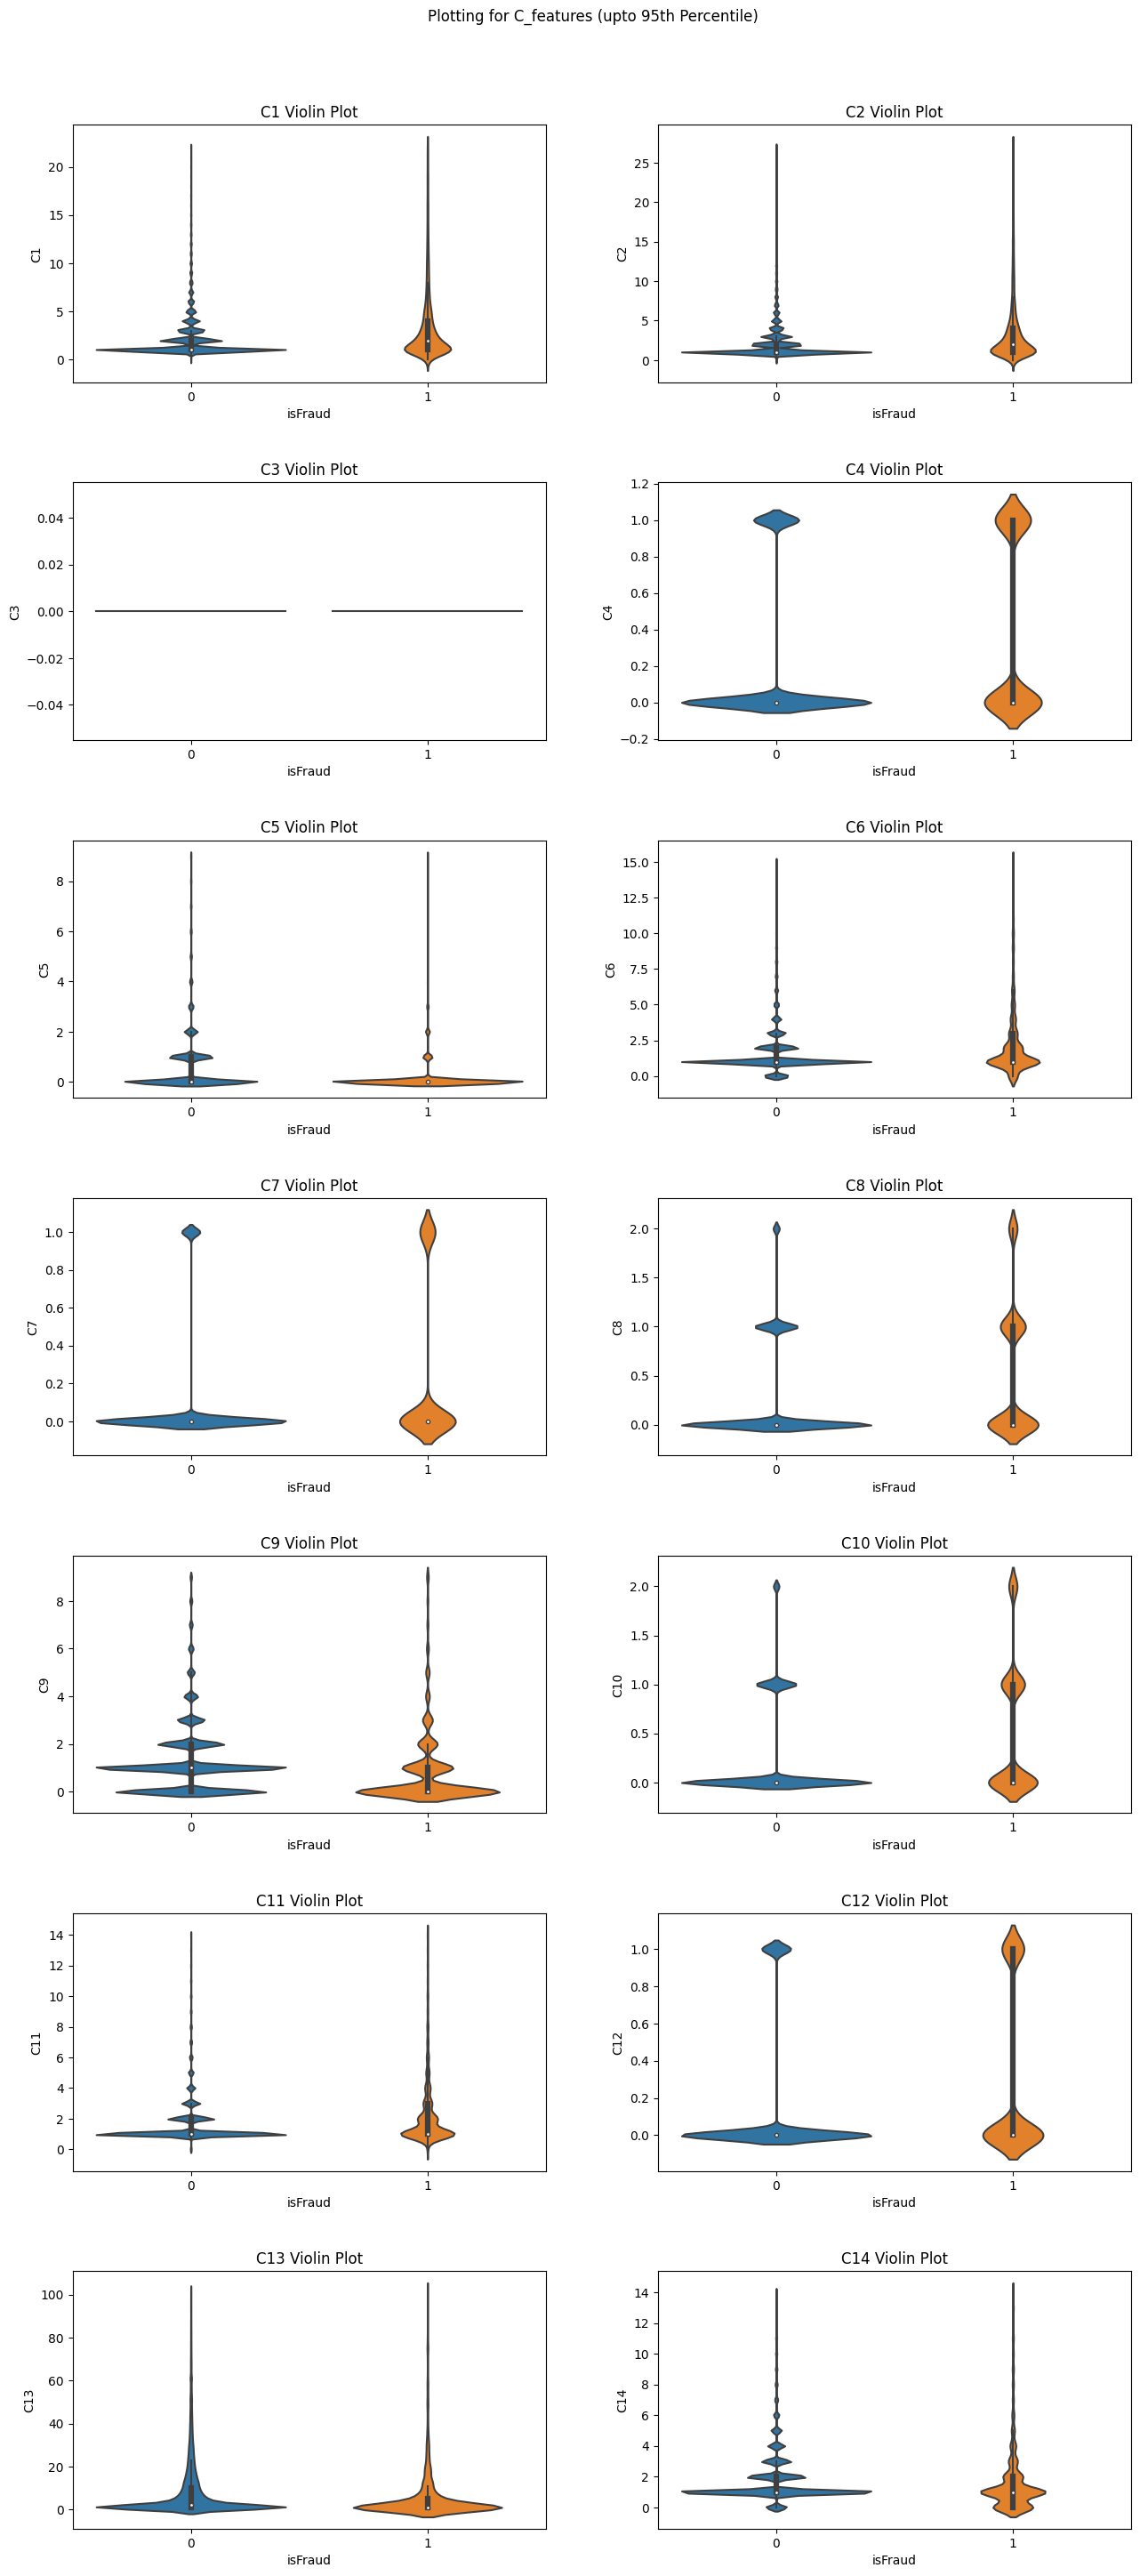

In [ ]:
fig, axes = plt.subplots(7, 2, figsize=(14, 30))

fig.suptitle('Plotting for C_features (upto 95th Percentile)')
fig.tight_layout(pad=6.0)
idx = 0

for i in range(7):
    for j in range(2):

        if(idx==len(c_features)):
            break

        f = c_features[idx]
        idx+=1

        sns.violinplot(y=f, x='isFraud', data=train_data[train_data[f]<=np.percentile(train_data[f], 95)], ax=axes[i,j])
        axes[i,j].set_title(f+" Violin Plot")

In [ ]:
sns.pairplot(vars = c_features, hue = 'isFraud' , data = train_data, corner=True)
plt.suptitle("\nPair Plots of C_features\n")
plt.show()

KeyboardInterrupt: ignored

Error in callback <function _draw_all_if_interactive at 0x7f940c485000> (for post_execute):


KeyboardInterrupt: ignored

Error in callback <function flush_figures at 0x7f940c484280> (for post_execute):


KeyboardInterrupt: ignored

__Observation(s):__

1. All these feature have integral values with equal intervals and majority of the values corresponding to the C_features are 0.


2. The C features seems to be highly inter-correlated.
<br><br>

> __D_features__

In [ ]:
d_features = ["D"+str(i) for i in range(1,16) if "D"+str(i) in numf]

In [ ]:
for f in d_features:
    print('\n',"*"*10,f,"*"*10,'\n')
    print(train_data[f].describe())
    len_unique_cat = len(np.unique(train_data[f]))
    print("\n{} feature has {} unique categories\n".format(f, len_unique_cat))


 ********** D1 ********** 

count    589271.000000
mean         94.347568
std         157.660387
min           0.000000
25%           0.000000
50%           3.000000
75%         122.000000
max         640.000000
Name: D1, dtype: float64

D1 feature has 642 unique categories


 ********** D2 ********** 

count    309743.000000
mean        169.563231
std         177.315865
min           0.000000
25%          26.000000
50%          97.000000
75%         276.000000
max         640.000000
Name: D2, dtype: float64

D2 feature has 642 unique categories


 ********** D3 ********** 

count    327662.000000
mean         28.343348
std          62.384721
min           0.000000
25%           1.000000
50%           8.000000
75%          27.000000
max         819.000000
Name: D3, dtype: float64

D3 feature has 650 unique categories


 ********** D4 ********** 

count    421618.000000
mean        140.002441
std         191.096774
min        -122.000000
25%           0.000000
50%          26.000000
75

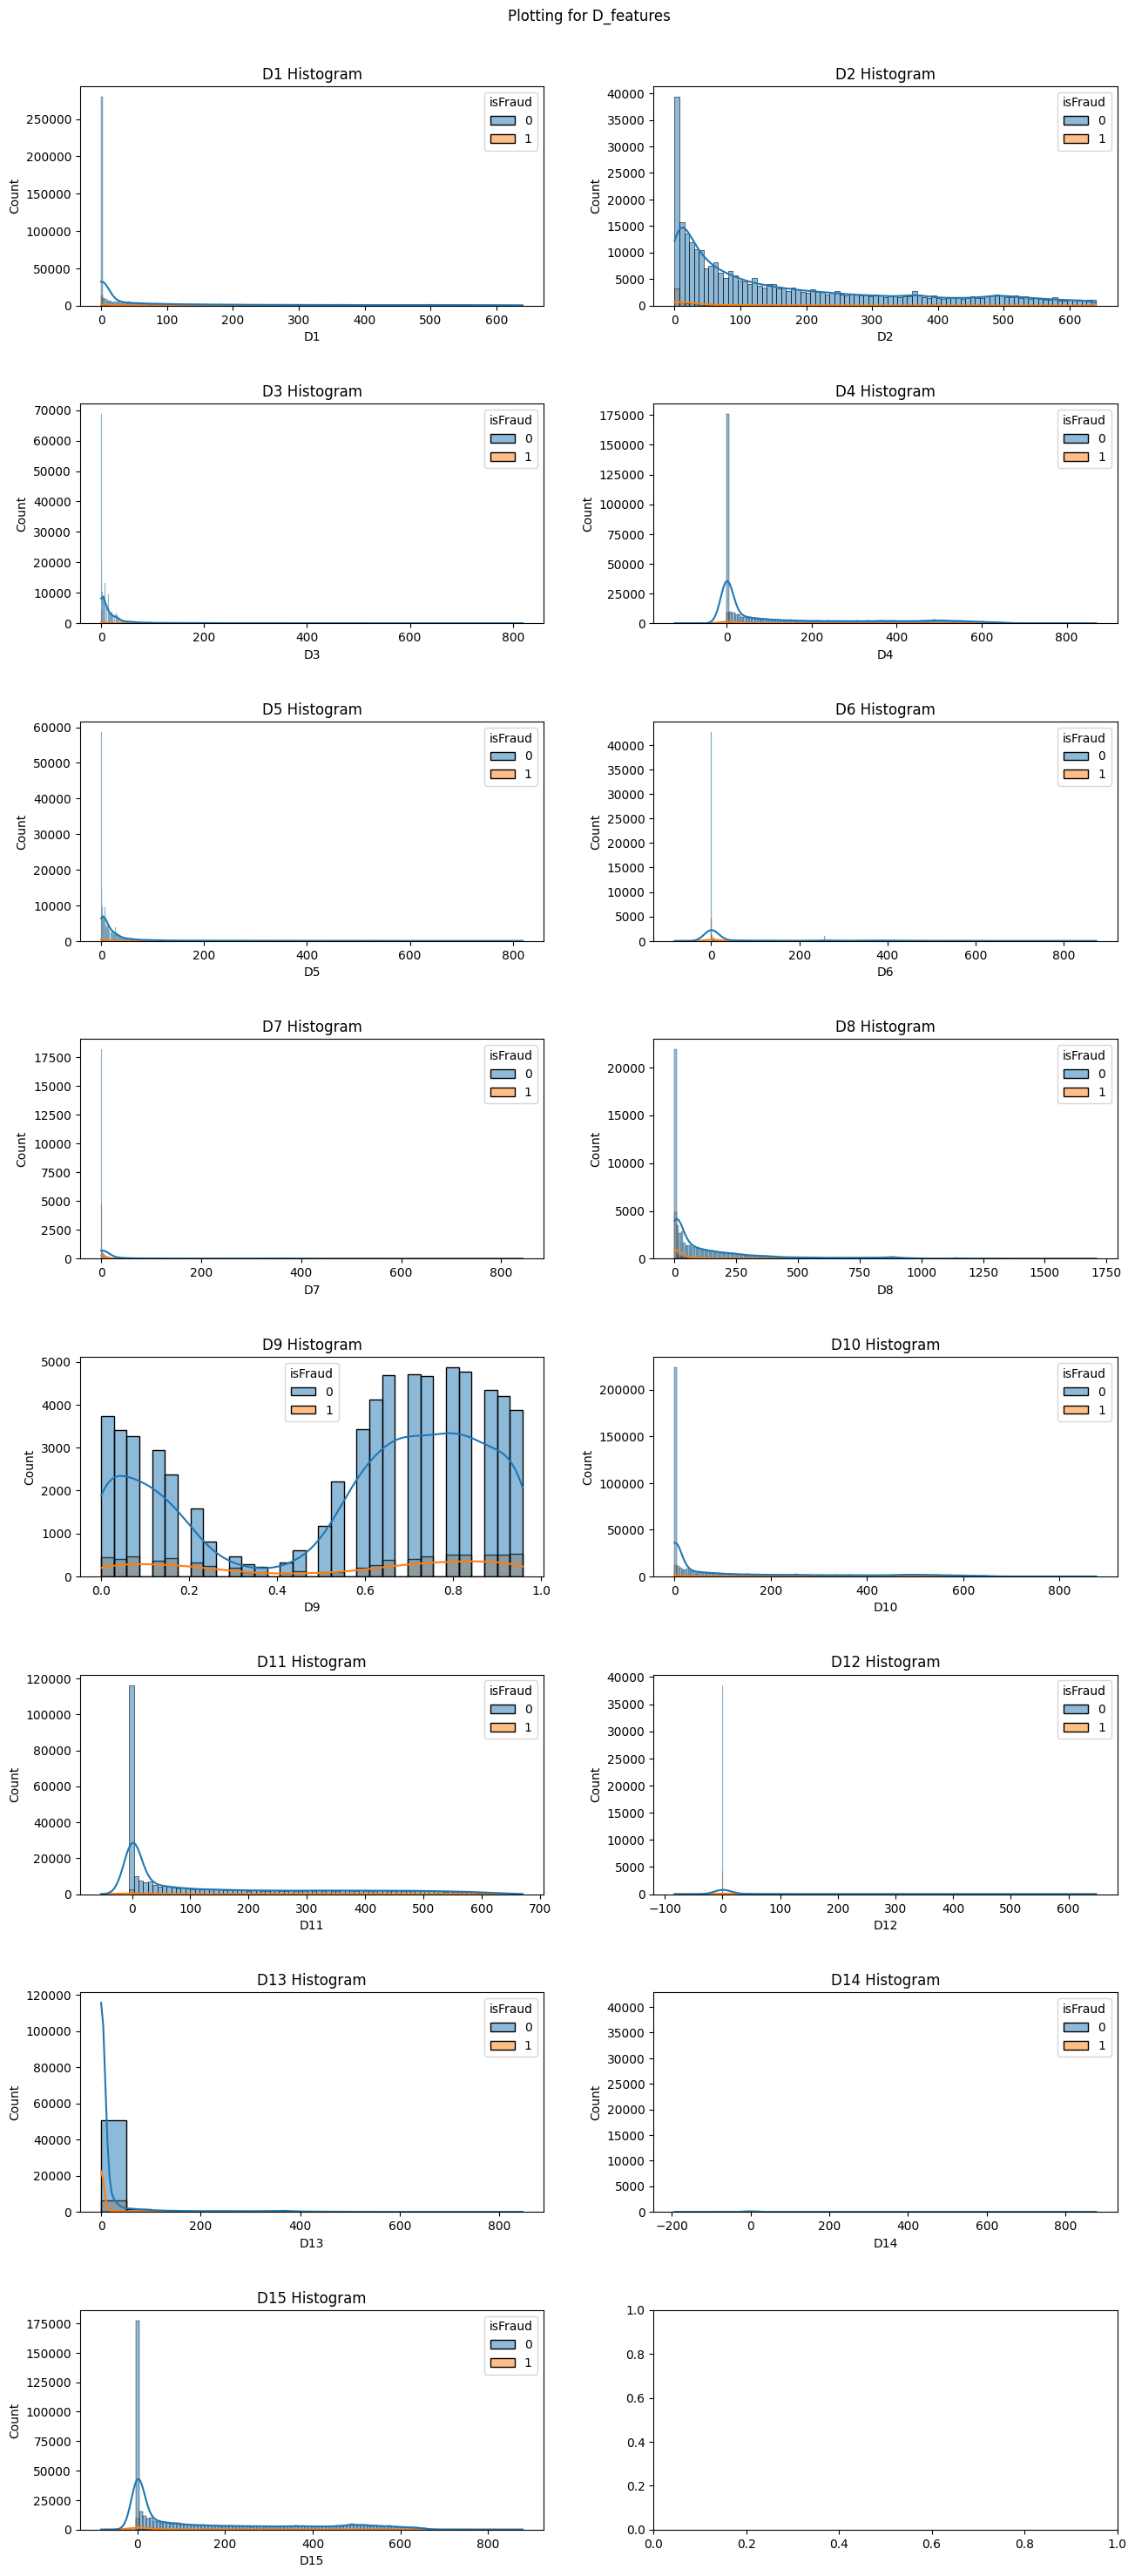

In [ ]:
fig, axes = plt.subplots(8, 2, figsize=(14, 30))

fig.tight_layout(pad=6.0)
fig.suptitle('Plotting for D_features', y=1)
idx = 0

for i in range(8):
    for j in range(2):

        if(idx==len(d_features)):
            break

        f = d_features[idx]
        idx+=1

        sns.histplot(x=f,hue='isFraud', data=train_data, ax=axes[i,j], kde=True)
        axes[i,j].set_title(f+" Histogram")

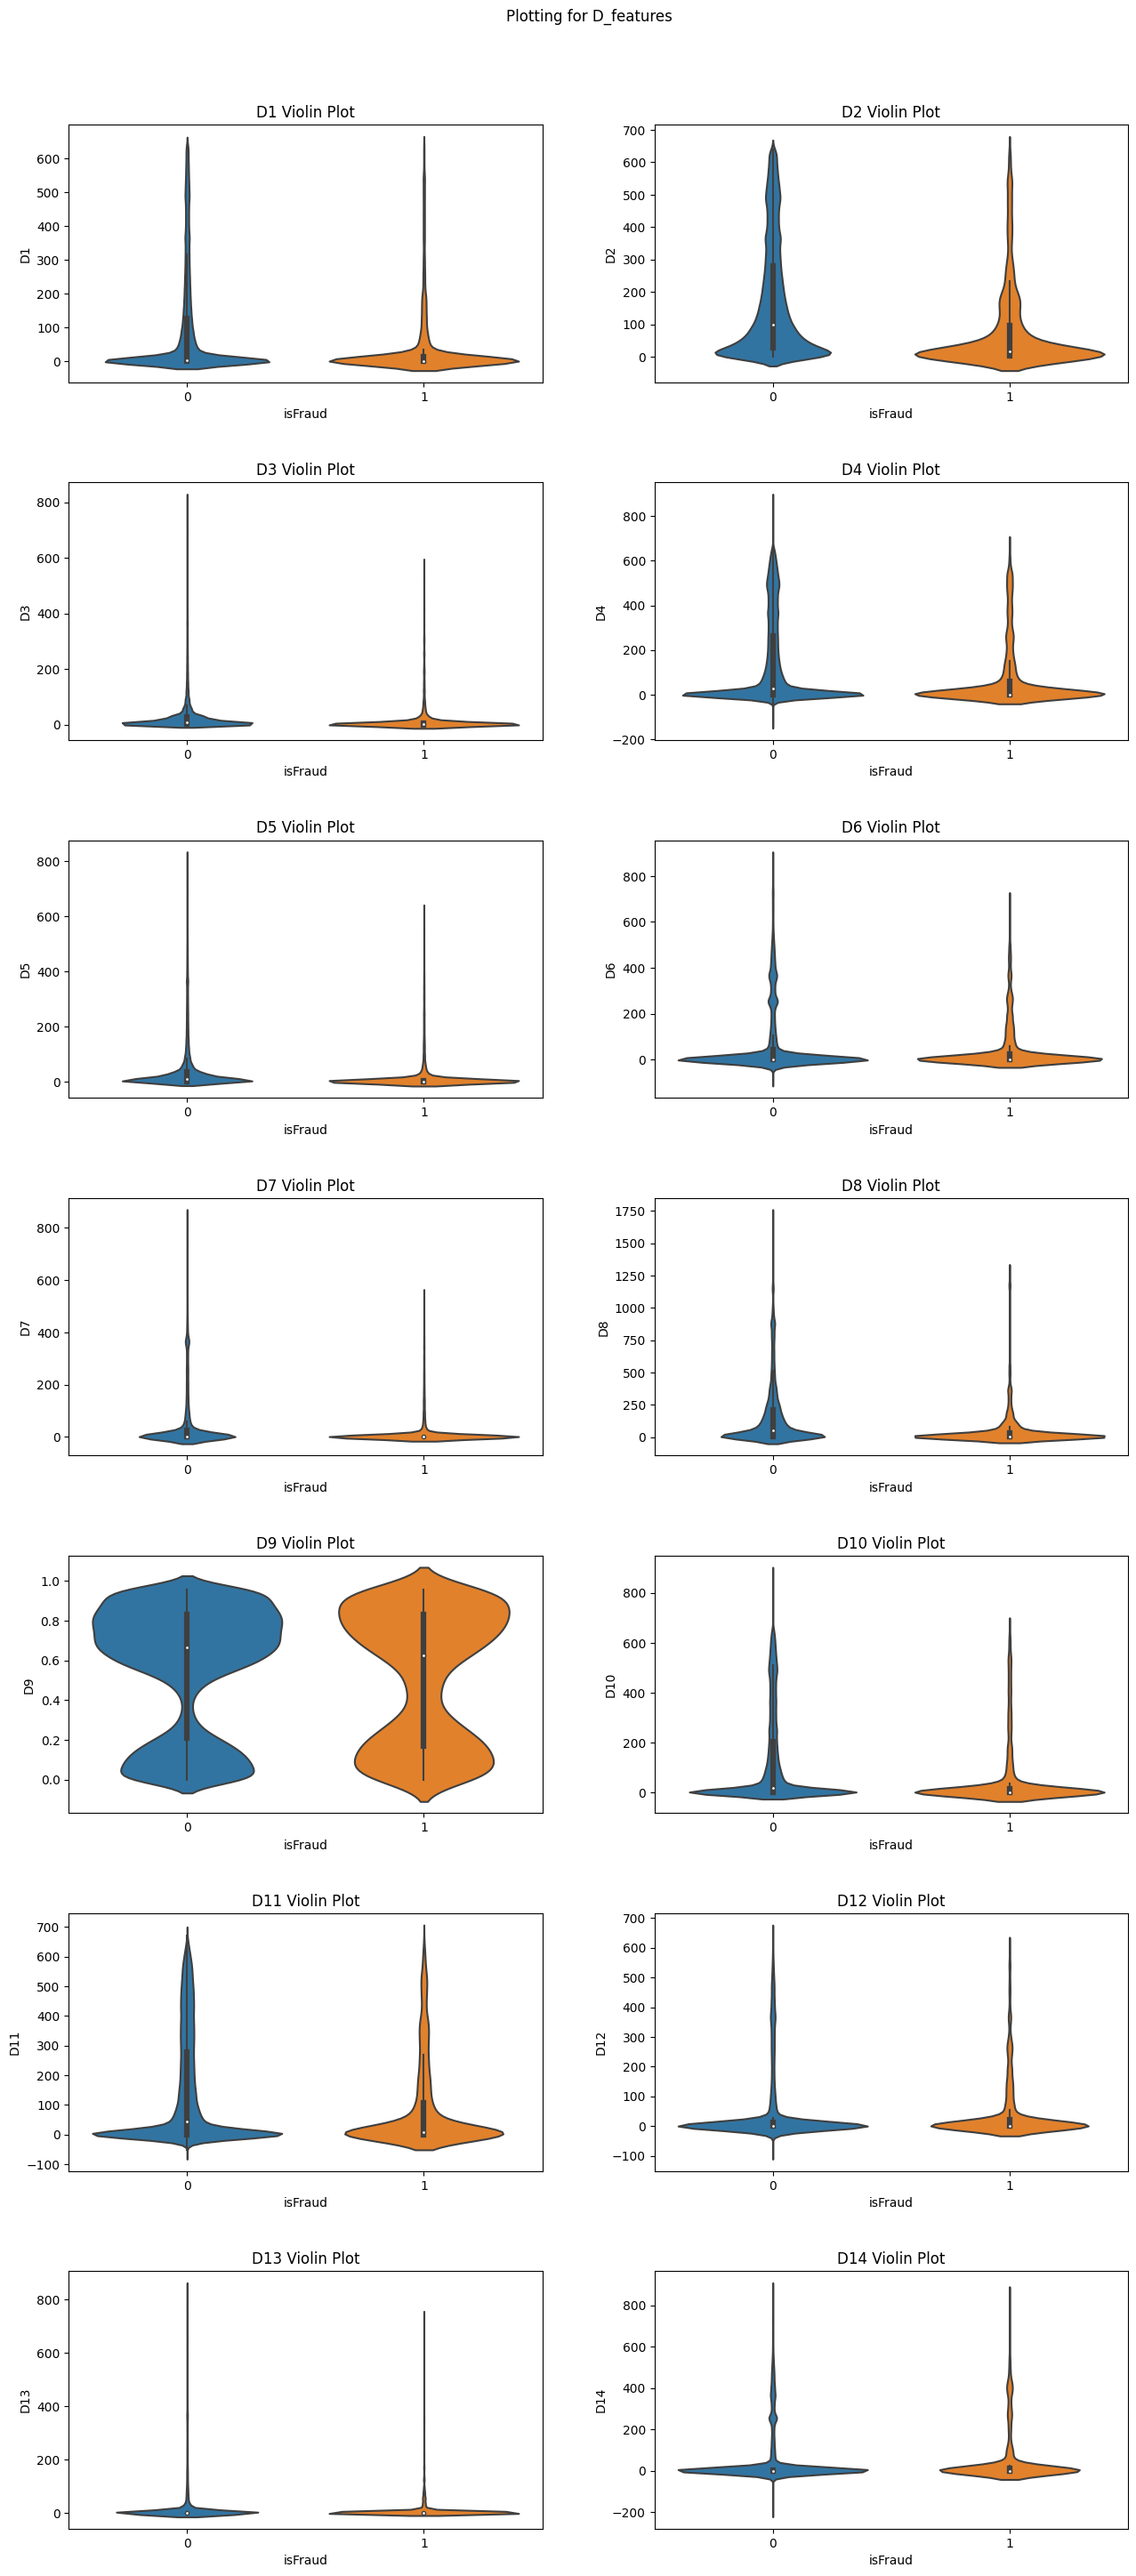

In [ ]:
fig, axes = plt.subplots(7, 2, figsize=(14, 30))

fig.suptitle('Plotting for D_features')
fig.tight_layout(pad=6.0)
idx = 0

for i in range(7):
    for j in range(2):

        if(idx==len(d_features)):
            break

        f = d_features[idx]
        idx+=1

        sns.violinplot(y=f, x='isFraud', data=train_data, ax=axes[i,j], kde=True)
        axes[i,j].set_title(f+" Violin Plot")

In [ ]:
sns.pairplot(vars = d_features, hue='isFraud', data = train_data, corner=True)
plt.suptitle("\nPair Plots of D_features\n")
plt.show()

KeyboardInterrupt: ignored

__Observation(s):__

1. D_features correspond to the timedelta, such as days between previous transaction, etc.


2. D_features does not seem to be intercorrelated except for some where there is a possibility of inter correlation.
<br><br>

>__id_01-id_11__

In [ ]:
id_num_features = ['id_01', 'id_02', 'id_03', 'id_04', 'id_05', 'id_06', 'id_07', 'id_08', 'id_09', 'id_10', 'id_11']

In [ ]:
for f in id_num_features:
    print('\n',"*"*10,f,"*"*10,'\n')
    print(train_data[f].describe())
    len_unique_cat = len(np.unique(train_data[f]))
    print("\n{} feature has {} unique categories\n".format(f, len_unique_cat))

In [ ]:
fig, axes = plt.subplots(6, 2, figsize=(14, 25))

fig.tight_layout(pad=6.0)
fig.suptitle('Plotting for Quantitative id features', y=1)
idx = 0

for i in range(6):
    for j in range(2):

        if(idx==len(id_num_features)):
            break

        f = id_num_features[idx]
        idx+=1

        sns.histplot(x=f,hue='isFraud', data=train_data, ax=axes[i,j], kde=True)
        axes[i,j].set_title(f+" Histogram")

In [ ]:
fig, axes = plt.subplots(6, 2, figsize=(14, 25))

fig.suptitle('Plotting for Quantitative id features')
fig.tight_layout(pad=6.0)
idx = 0

for i in range(6):
    for j in range(2):

        if(idx==len(id_num_features)):
            break

        f = id_num_features[idx]
        idx+=1

        sns.violinplot(y=f, x='isFraud', data=train_data, ax=axes[i,j], kde=True)
        axes[i,j].set_title(f+" Violin Plot")

In [ ]:
sns.pairplot(vars = id_num_features, hue='isFraud', data = train_data, corner=True)
plt.suptitle("\nPair Plots of id_num_features\n")
plt.show()

__Observation(s):__

1. “id01 to id11 are numerical features for identity, which is collected by Vesta and security partners such as device rating, ip_domain rating, proxy rating, etc. Also it recorded behavioral fingerprint like account login times/failed to login times, how long an account stayed on the page, etc. All of these are not able to elaborate due to security partner T&C.


2. Based on the scatter plots, the id_feature seems important in identifying the transaction status.
<br><br>

> __V_features__

In [ ]:
v_features = ["V"+str(i) for i in range(1,340) if "V"+str(i) in numf]

In [ ]:
for f in v_features:
    print('\n',"*"*10,f,"*"*10,'\n')
    print(train_data[f].describe())
    len_unique_cat = len(np.unique(train_data[f]))
    print("\n{} feature has {} unique categories\n".format(f, len_unique_cat))

In [ ]:
fig, axes = plt.subplots(113, 3, figsize=(14, 450))

fig.suptitle('Plotting for V_features', y=1)
fig.tight_layout(pad=6.0)
idx = 0

for i in range(113):
    for j in range(3):

        if(idx==len(v_features)):
            break

        f = v_features[idx]
        idx+=1

        sns.violinplot(y=f, x='isFraud', data=train_data, ax=axes[i,j])
        axes[i,j].set_title(f+" Violin Plot")

__Observation(s):__

1. Almost every V_feature has a value of 0 in majority of transactions.


2. Based on the missing value and number of unique value analysis we can find multiple V_features to have the same number of missing values and the same number of unique values. This pattern is widely present in the V_features.


3. In the first look these features does not look very important but we will see later on whether these are really useful or not.
<br><br>

#### - Bivariate Analysis
<br>

>__ProductCD vs TransactionAmt__

In [ ]:
sns.boxplot(x='ProductCD', y='TransactionAmt', data=train_data[train_data['TransactionAmt']<=np.percentile(train_data['TransactionAmt'], 95)], hue='isFraud')
plt.title('\nProductCD vs TransactionAmt(upto 95th Percentile)\n')
plt.show()

__Observation(s):__

1. The amount spent in highest for ProductCD "R" and is lowest for ProductCD "S" and "C".


2. For ProductCD "W", "H" and "R" if the TransactionAmt is high then that transaction is often a fraudulent transaction.
<br><br>

>__P_emaildomain vs TransactionAmt__

In [ ]:
plt.figure(figsize=(50,6))
ax = sns.violinplot(x='P_emaildomain', y='TransactionAmt', data=train_data[train_data['TransactionAmt']<=np.percentile(train_data['TransactionAmt'], 95)], hue='isFraud', split=False)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='center')
plt.title('\nP_emaildomain vs TransactionAmt(upto 95th Percentile)\n')
plt.show()

__Observation(s):__

1. Some Domains like "verizon.net", have a high average TransactionAmt as compared to the average TransactionAmt of other domains.


2. Some Domains like "yahoo.com" have a high average TransactionAmt for Fraudulent Transactions when compared with the avearge Transaction Amt for Non-Fraudulent Transactions.


3. Some Domains like "optonline.net" have a high average TransactionAmt for Non-Fraudulent Transactions when compared with the avearge Transaction Amt for Fraudulent Transactions.
<br><br>

> __TransactionDT vs TransctionAmt__

In [ ]:
sns.scatterplot(x='TransactionDT', y='TransactionAmt', hue='isFraud', data = train_data)
plt.title("\nTransactionDT vs TransactionAmt\n")
plt.show()

__Observation(s):__

1. There seem to be some outliers in the TransactionAmt, we will be dealing with these outliers later on.
<br><br>

In [ ]:
# Removing Outlier from the TransactionAmt

train_data = train_data[train_data['TransactionAmt']<30000]

In [ ]:
sns.scatterplot(x='TransactionDT', y='TransactionAmt', hue='isFraud', data = train_data)
plt.title("\nTransactionDT vs TransactionAmt(Outlier Removed)\n")
plt.show()

> __card1-card6 vs TransactionAmt__

In [ ]:
sns.scatterplot(x='card1', y='TransactionAmt', hue='isFraud', data = train_data)
plt.title("\ncard1 vs TransactionAmt\n")
plt.show()

In [ ]:
sns.scatterplot(x='card2', y='TransactionAmt', hue='isFraud', data = train_data)
plt.title("\ncard2 vs TransactionAmt\n")
plt.show()

In [ ]:
sns.scatterplot(x='card3', y='TransactionAmt', hue='isFraud', data = train_data)
plt.title("\ncard3 vs TransactionAmt\n")
plt.show()

In [ ]:
sns.boxplot(x=train_data['card4'], y='TransactionAmt', hue='isFraud', data=train_data[train_data['TransactionAmt']<=np.percentile(train_data['TransactionAmt'], 95)])
plt.title('\ncard4 vs TransactionAmt(upto 95th Percentile)\n')
plt.show()

__Observation(s):__

1. The median TransactionAmt of fraudulent transactions is generally higher than the median TransactionAmt of Legit Transactions done using cards of the company discover or american express.
<br><br>

In [ ]:
sns.scatterplot(x='card5', y='TransactionAmt', hue='isFraud', data = train_data)
plt.title("\ncard5 vs TransactionAmt\n")
plt.show()

In [ ]:
sns.boxplot(x=train_data['card6'], y='TransactionAmt', hue='isFraud', data=train_data[train_data['TransactionAmt']<=np.percentile(train_data['TransactionAmt'], 95)])
plt.title('\ncard6 vs TransactionAmt(upto 95th Percentile)\n')
plt.show()

__Observation(s):__

1. The TransactionAmt of fraudulent transactions is generally lower than the TransactionAmt of Legit Transactions done using credit card.


2. Transactions with "debit or credit" or "charge card" label are hardly fraudulent.
<br><br>

> __addr1-addr2 vs TransactionAmt__

In [ ]:
sns.scatterplot(x='addr1', y='TransactionAmt', hue='isFraud', data = train_data)
plt.title("\naddr1 vs TransactionAmt\n")
plt.show()

In [ ]:
sns.scatterplot(x='addr2', y='TransactionAmt', hue='isFraud', data = train_data)
plt.title("\naddr2 vs TransactionAmt\n")
plt.show()

> __dist1-dist2 vs TransactionAmt__

In [ ]:
sns.scatterplot(x='dist1', y='TransactionAmt', hue='isFraud', data = train_data)
plt.title("\ndist1 vs TransactionAmt\n")
plt.show()

In [ ]:
sns.scatterplot(x='dist2', y='TransactionAmt', hue='isFraud', data = train_data)
plt.title("\ndist2 vs TransactionAmt\n")
plt.show()

> __C1-C14 vs TransactionAmt__

In [ ]:
sns.scatterplot(x='C1', y='TransactionAmt', hue='isFraud', data = train_data)
plt.title("\nC1 vs TransactionAmt\n")
plt.show()

In [ ]:
sns.scatterplot(x='C2', y='TransactionAmt', hue='isFraud', data = train_data)
plt.title("\nC2 vs TransactionAmt\n")
plt.show()

In [ ]:
sns.scatterplot(x='C3', y='TransactionAmt', hue='isFraud', data = train_data)
plt.title("\nC3 vs TransactionAmt\n")
plt.show()

In [ ]:
sns.scatterplot(x='C4', y='TransactionAmt', hue='isFraud', data = train_data)
plt.title("\nC4 vs TransactionAmt\n")
plt.show()

In [ ]:
sns.scatterplot(x='C5', y='TransactionAmt', hue='isFraud', data = train_data)
plt.title("\nC5 vs TransactionAmt\n")
plt.show()

In [ ]:
sns.scatterplot(x='C6', y='TransactionAmt', hue='isFraud', data = train_data)
plt.title("\nC6 vs TransactionAmt\n")
plt.show()

In [ ]:
sns.scatterplot(x='C7', y='TransactionAmt', hue='isFraud', data = train_data)
plt.title("\nC7 vs TransactionAmt\n")
plt.show()

In [ ]:
sns.scatterplot(x='C8', y='TransactionAmt', hue='isFraud', data = train_data)
plt.title("\nC8 vs TransactionAmt\n")
plt.show()

In [ ]:
sns.scatterplot(x='C9', y='TransactionAmt', hue='isFraud', data = train_data)
plt.title("\nC9 vs TransactionAmt\n")
plt.show()

In [ ]:
sns.scatterplot(x='C10', y='TransactionAmt', hue='isFraud', data = train_data)
plt.title("\nC10 vs TransactionAmt\n")
plt.show()

In [ ]:
sns.scatterplot(x='C11', y='TransactionAmt', hue='isFraud', data = train_data)
plt.title("\nC11 vs TransactionAmt\n")
plt.show()

In [ ]:
sns.scatterplot(x='C12', y='TransactionAmt', hue='isFraud', data = train_data)
plt.title("\nC12 vs TransactionAmt\n")
plt.show()

In [ ]:
sns.scatterplot(x='C13', y='TransactionAmt', hue='isFraud', data = train_data)
plt.title("\nC13 vs TransactionAmt\n")
plt.show()

In [ ]:
sns.scatterplot(x='C14', y='TransactionAmt', hue='isFraud', data = train_data)
plt.title("\nC14 vs TransactionAmt\n")
plt.show()

__Observation(s):__

1. C_features being correlated show very similar behavior with TransactionAmt as can be seen from various almost similar plots above. Correlated C_features have very similar plot against TransactionAmt.
<br><br>

> __D1-D15 vs TransactionAmt__

In [ ]:
sns.scatterplot(x='D1', y='TransactionAmt', hue='isFraud', data = train_data)
plt.title("\nD1 vs TransactionAmt\n")
plt.show()

In [ ]:
sns.scatterplot(x='D2', y='TransactionAmt', hue='isFraud', data = train_data)
plt.title("\nD2 vs TransactionAmt\n")
plt.show()

In [ ]:
sns.scatterplot(x='D3', y='TransactionAmt', hue='isFraud', data = train_data)
plt.title("\nD3 vs TransactionAmt\n")
plt.show()

In [ ]:
sns.scatterplot(x='D4', y='TransactionAmt', hue='isFraud', data = train_data)
plt.title("\nD4 vs TransactionAmt\n")
plt.show()

In [ ]:
sns.scatterplot(x='D5', y='TransactionAmt', hue='isFraud', data = train_data)
plt.title("\nD5 vs TransactionAmt\n")
plt.show()

In [ ]:
sns.scatterplot(x='D1', y='TransactionAmt', hue='isFraud', data = train_data)
plt.title("\nD1 vs TransactionAmt\n")
plt.show()

In [ ]:
sns.scatterplot(x='D6', y='TransactionAmt', hue='isFraud', data = train_data)
plt.title("\nD6 vs TransactionAmt\n")
plt.show()

In [ ]:
sns.scatterplot(x='D7', y='TransactionAmt', hue='isFraud', data = train_data)
plt.title("\nD7 vs TransactionAmt\n")
plt.show()

In [ ]:
sns.scatterplot(x='D8', y='TransactionAmt', hue='isFraud', data = train_data)
plt.title("\nD8 vs TransactionAmt\n")
plt.show()

In [ ]:
sns.scatterplot(x='D9', y='TransactionAmt', hue='isFraud', data = train_data)
plt.title("\nD9 vs TransactionAmt\n")
plt.show()

In [ ]:
sns.scatterplot(x='D10', y='TransactionAmt', hue='isFraud', data = train_data)
plt.title("\nD10 vs TransactionAmt\n")
plt.show()

In [ ]:
sns.scatterplot(x='D11', y='TransactionAmt', hue='isFraud', data = train_data)
plt.title("\nD11 vs TransactionAmt\n")
plt.show()

In [ ]:
sns.scatterplot(x='D12', y='TransactionAmt', hue='isFraud', data = train_data)
plt.title("\nD12 vs TransactionAmt\n")
plt.show()

In [ ]:
sns.scatterplot(x='D13', y='TransactionAmt', hue='isFraud', data = train_data)
plt.title("\nD13 vs TransactionAmt\n")
plt.show()

In [ ]:
sns.scatterplot(x='D14', y='TransactionAmt', hue='isFraud', data = train_data)
plt.title("\nD14 vs TransactionAmt\n")
plt.show()

In [ ]:
sns.scatterplot(x='D15', y='TransactionAmt', hue='isFraud', data = train_data)
plt.title("\nD15 vs TransactionAmt\n")
plt.show()

<br><br>

# Summary

- Dataset is highly imbalanced with 96.5% negative class labels and 3.5% positive class labels.


- A large number of features have a significant amount of missing values.

<br>


> __Categorical Features__

<br>

- Majority of the transactions have ProductCD "W".


- card1-card6 features correspond to the card features and seem important in predicting the transaction status.


- Out of all the card features card1, card2, card3 and card5 features have numerical categories and the card4 and card6 are non-numeric features corresponding to the card company and card type respectively.


- addr1 feature corresponds to the billing region and addr2 feature corresponds to the billing country and majority of the transactions have the same value for card2 since most of the transactions belong to the same country.


- P_emaildomain and R_emaildomain features correspond to the Email Domain of the Purchaser and the Recipient respectively. Majority of the R_emaildomain values are missing since not every transaction needs a receipt from the recipient.


- M1-M9 feature corresponds to the match features like whether the name on card matches etc. Majority of transactions have missing values corresponding to these features.


- DeviceType feature corresponds to the device used for transactions namely mobile and desktop and in majority of the transactions, the DeviceType information is missing.


- DeviceInfo feature corresponds to the Model Name and Number of the device.


- id_12-id_38 features correspond to the identity of the Client, some of these features are self explanatory like id_30 feature corresponds to the OS Name and Version, id_31 feature corresponds to the browser name and version and id_33 feature corresponds to the device screen dimensions.

<br>

> __Quantitative Features__

<br>

- TransactionDT feature corresponds to the number of seconds elapsed from a reference time and the train and test dataset has been splitted based on time. The test dataset is the continuation after the train dataset and there is some time gap between both the datasets.


- Fraudulent Transactions generally have higher median TransactionAmt than the median TransactionAmt of Non-Fraudulent Transactions.


- C1-C14 have high inter correlation and most of these features have values of 0 in majority of the transactions.


- D_features correspond to the timedelta, such as the number of days between the previous transaction, etc.


- D_features does not seem to be intercorrelated except for some where there is a possibility of inter correlation.


- id01-id11 features are Quantitative Identify Features and there is no inter-correlation amongst these features.


- The largest number of features in the dataset are V_feature which are vesta engineered features and have a count of 339. Many of these features have the same number of missing values and also the same number of unique values, thus forming a group. Also, many of these features have high inter-correlation.
<br><br>

<hr>
<hr>
<hr>